# Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
import seaborn as sb
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
games_data = pd.read_csv('/datasets/games.csv')
games_data.head(5);

In [3]:
games_data.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8792,The Amazing Spider-Man (Console Version),Wii,2012.0,Action,0.1,0.04,0.0,0.01,NaN,NaN,NaN


In [4]:
games_data.shape

(16715, 11)

In [5]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print(games_data.duplicated().sum())

0


In [7]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


The most frequent years in the table are 2007 and 2010.It lookes liked there are possible outliers in the data in almost all of the columns that will need to be adressed during the further analysis.

In [8]:
#determining which persent of the missing values are present in the dataset 
#and which is more suitable for dealing with them.
games_data.isna().mean().round(4) * 100

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

During this preliminary analysis, it is obvious that the columns for critic and user scores cannot be replaced with average score or deleted because the percent of missing values is significantly above the recommended threshold for dealing with them in such a way. In light of this fact, I will present another solution.

In [9]:
games_data['Name'].value_counts()

Need for Speed: Most Wanted                   12
LEGO Marvel Super Heroes                       9
Madden NFL 07                                  9
Ratatouille                                    9
FIFA 14                                        9
                                              ..
MonHun Nikki: Poka Poka Ailu Mura              1
Legends of Oz: Dorothy's Return                1
Itadaki Street 2: Neon Sign wa Bara Iro ni     1
Minna no Conveni                               1
Mind Quiz: Your Brain Coach                    1
Name: Name, Length: 11559, dtype: int64

Some names of the games are repeated in the dataset, it would be worth exploring to understand if they are recurring releases of the same game during different years, or just simultaneous release on various platforms.

In [10]:
games_data['Platform'].value_counts().count()

31

There are 31 differnt platforms in the dataset.

In [11]:
games_data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [12]:
games_data['Genre'].value_counts().count()

12

In [13]:
games_data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

The five most frequent genres are: Action,Sports,Misc,Role-Playing and Shooter, This information will be usefull when answering the question regarding the most popular platforms.

In [14]:
games_data['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

The data presented in the years columns ranges from year 1980 to 2016.

In [15]:
games_data['Critic_Score'].value_counts().head()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
Name: Critic_Score, dtype: int64

The most frequent range of Critic Scores is from seventy two eighty.

In [16]:
games_data['Critic_Score'].mean()

68.96767850559173

In [17]:
games_data['Critic_Score'].median()

71.0

The mean and median of the "Critic Score" data are roughly the same.

In [18]:
games_data['User_Score'].value_counts().head()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: User_Score, dtype: int64

In [19]:
games_data['User_Score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

The most frequent value in the User Score column is 'TBD'(to be determined). The question here is whether the value is legitimate, meaning that it is expected that it will be replaced with the actual score, or perhaps, it has never been updated because there was no need. For example, if a particular game or platform game seized to exist.

In [20]:
games_data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

There is a range of rating present in the database:

E-Everyone(ages six and older),

T-Teen(for ages thirteen and older),

M-Nature(for ages seventeen and older),

E10+(recommended for ages ten and older even though it is still considered for everyone),

EC-Early Childhood(ages three and older),

K-A-Kids to adults(meaning it may be unsuitable for children under the age of six). This rating was later switched to E, and it no longer exists.

RP-Rating pending(meaning the game has been submitted to ESRB but is still awaiting to be reviewed),

AO- Adults only(ages 18 and older),

Souces: 

"ESRB Rating Symbols"
 https://www.xbox.com/en-US/marketplace/gameratings
 
"July 29, 1994: Videogame Makers Propose Ratings Board to Congress"
https://www.wired.com/2009/07/dayintech-0729/

## Step 1.Conclusion

The dataset has 11 columns and 16715 rows. According to the preliminary analysis, there are no duplicates, including a different spelling of the same word. Most of the columns' missing values can be replaced with average, but the Critic Score and User Score require further analysis. All of the columns require outliers removal. The most popular years in the table are 2007 and 2010. It would be worth it to see if those years were also a major intersection of various platforms' establishment and decline.


## Step 2. Prepare the data

In [21]:
#Replace the column names (make them lowercase)
games_data.columns = map(str.lower, games_data.columns)
games_data.head();

In [22]:
#Convert the data to the required types
year_release_mean = games_data['year_of_release'].mean()
games_data['year_of_release'] = games_data['year_of_release'].fillna(value=year_release_mean)
games_data['year_of_release'] = games_data['year_of_release'].astype('int')
games_data['year_of_release'].head(10)

0    2006
1    1985
2    2008
3    2009
4    1996
5    1989
6    2006
7    2006
8    2009
9    1984
Name: year_of_release, dtype: int64

The number of missing values in thsi column is not that significant, so if we replace them with the mean it will not be damaging to the overall analysis.

In [23]:
#which years we have tbd values
games_data.loc[games_data['user_score'] == 'tbd'];

Ok, so the problem with TBD values is that they are not likely to be replaced with any definite score because most of the platforms that have this value attributed to them had their release over 15 years ago. Another issue is that there is a possibility that the platforms in question or games that they host may no longer exist which means that if we replace the value with mean or median, we will seriously skew the metrics.

In [24]:
#working on missing values
user_score_data = (games_data[(games_data['user_score'] != 'tbd') & - (games_data['user_score'].isnull())])
user_score = user_score_data['user_score']
user_score = pd.to_numeric(user_score_data['user_score'], downcast ='float')
games_data['user_score'] = user_score*10


In [25]:
#checking if the same of each game always correspond to the user score or perhaps, these values do not appear 
#for the same game all the time
games_data['user_score'] = games_data['user_score'].fillna(games_data.groupby(['name'])['user_score'].transform('first'))
games_data['user_score'].isnull().sum()
games_data['user_score'].head()

0    80.0
1     NaN
2    83.0
3    80.0
4     NaN
Name: user_score, dtype: float32

In [26]:
games_data['critic_score'] = pd.to_numeric(games_data['critic_score'], downcast ='float')

games_data['critic_score'] = games_data['critic_score'].fillna(games_data.groupby(['name'])['critic_score'].transform('first'))

#games_data['critic_score'] = games_data['critic_score'].astype(int)
games_data['critic_score'].head()

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
Name: critic_score, dtype: float32

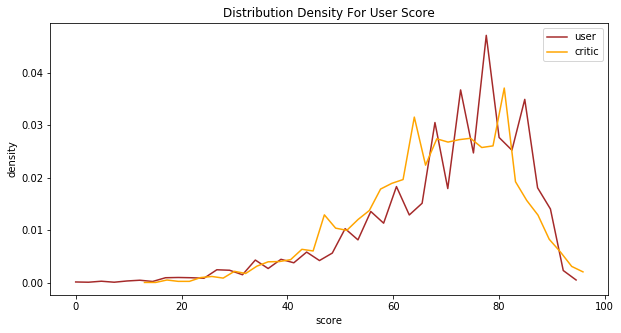

In [27]:
#detrmining if user_score values correspond with the critic_score values and can be replaces with one another
user_score_values = games_data['user_score'].values
critic_score_values = games_data['critic_score'].values

h1 = np.histogram(user_score_values[np.where(np.isnan(user_score_values) == False)], bins = 40, density = True)
h0 = np.histogram(critic_score_values[np.where(np.isnan(critic_score_values) == False)], bins = 40, density = True)

ax = plt.figure(figsize = (10,5))
plt.title('Distribution Density For User Score')
plt.plot(h1[1][:-1],h1[0], label = 'user',color='brown')
plt.plot(h0[1][:-1],h0[0], label = 'critic',color='orange')
plt.xlabel('score')
plt.ylabel('density')
plt.legend(loc ='best')

Okay, based on the graph we can conclude that the user score and the critic score roughly go along with each other. It is not perfect, but it is better than leaving the missing values as is or replacig with median and mean and skewing the data.

In [28]:
#replacing the misisng values for one column with another and checking how many we have left.
games_data['user_score'] = games_data['user_score'].fillna(games_data.groupby(['critic_score'])['user_score'].transform('first'))
games_data['user_score'].isna().mean().round(4) * 100


43.56

In [29]:
#the same for a different column
games_data['critic_score'] = games_data['critic_score'].fillna(games_data.groupby(['user_score'])['critic_score'].transform('first'))
games_data['critic_score'].isna().mean().round(4) * 100

43.59

In [30]:
user_score_mean = games_data['user_score'].mean()
games_data['user_score'] = games_data['user_score'].fillna(value= user_score_mean)

In [31]:
user_score_mean = games_data['critic_score'].mean()
games_data['critic_score'] = games_data['critic_score'].fillna(value= user_score_mean)

In [32]:
games_data['rating'] = games_data['rating'].fillna(games_data.groupby(['name'])['rating'].transform('first'))

In [33]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

#### Finding and removing the outliers for various columns

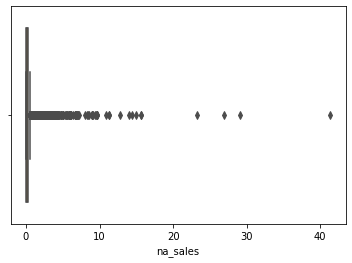

In [34]:
#determining the outliers
sns.boxplot(x=games_data['na_sales'],color='orange')

In [35]:
removed_outliers_na_sales = games_data['na_sales'].between(games_data['na_sales'].quantile(.05), games_data['na_sales'].quantile(.95))

games_data = games_data.query("na_sales < 20")

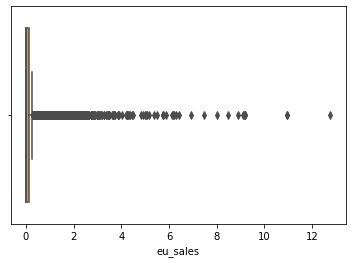

In [36]:
sns.boxplot(x=games_data['eu_sales'],color='orange')

In [37]:
removed_outliers_eu_sales = games_data['eu_sales'].between(games_data['eu_sales'].quantile(.05), games_data['eu_sales'].quantile(.95))

games_data = games_data.query("eu_sales < 10")

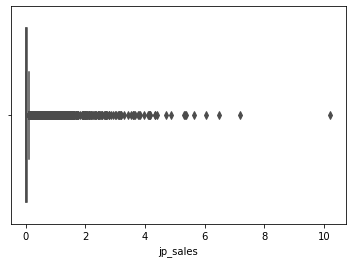

In [38]:
sns.boxplot(x=games_data['jp_sales'],color='orange')

In [39]:
removed_outliers_jp_sales = games_data['jp_sales'].between(games_data['jp_sales'].quantile(.05), games_data['jp_sales'].quantile(.95))

games_data = games_data.query("jp_sales < 9")

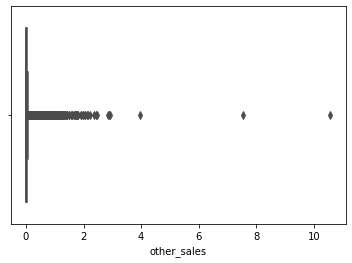

In [40]:
sns.boxplot(x=games_data['other_sales'],color='orange')

In [41]:
removed_outliers_other_sales = games_data['other_sales'].between(games_data['eu_sales'].quantile(.05), games_data['eu_sales'].quantile(.95))

games_data = games_data.query("eu_sales < 6")



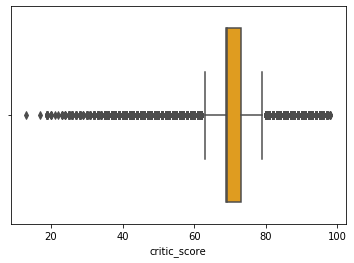

In [42]:
sns.boxplot(x=games_data['critic_score'],color='orange')

removed_outliers_critic_score = games_data['critic_score'].between(games_data['critic_score'].quantile(.05), games_data['critic_score'].quantile(.95))

games_data = games_data.query("critic_score > 20")

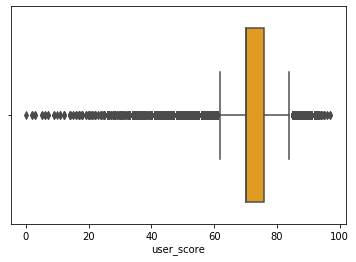

In [43]:
sns.boxplot(x=games_data['user_score'],color= 'orange')

removed_outliers_user_score = games_data['user_score'].between(games_data['user_score'].quantile(.05), games_data['user_score'].quantile(.95))

games_data = games_data.query("user_score > 1")

## Step 2. Conclusion

During this step I made the columns' names lowercase and convert the data to the required types. I replaced the missing values for year of release with average. In the previous step, we determined that the most popular years in the dataset were 2007 and 2010 and game industry hasn't been for that long anyway,it was only developing in the nineties into what it is today, so we can safely assume that most of the games were released around mid-2000s. The number of missing values in that columns is not that significant so even if we are a bit innacurate the overall picture will not be affected. 

In regards to TBD, given that the most of TBDs are attributed to the platforms and games that are over 15 years older, I treated them as NaNs. Subsequently, I replaced them in critic_score and user_score columns with each other values to reduce their number and then, with the mean. 

In this step I also calculated the total sales. 

## Step 3. Analyze the data

#### Look at how many games were released in different years. Is the data for every period significant?

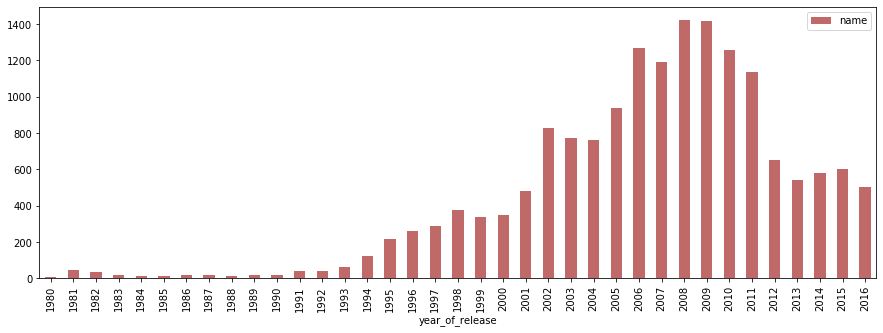

In [44]:
years_of_release = games_data.groupby('year_of_release')['name'].agg('count')
years_of_release.plot(kind = 'bar', x = 'year_of_release', y = 'name',alpha = 0.7,color='brown', legend = True, figsize = (15,5))
plt.show()


Based on this graph, we can say that from the year of 2007, a new wave of platforms emerged which basically created a second maximum of releases. This year is also a major intersection for newer platforms that exist till this day and the platforms that no longer exist. 

With this in mind, I created this year as a threshold for further analysis as anything before that is less relevant for determing the metrics for the present time and possible predictions for the future.

In [45]:
#slicing the data
data_2007 = games_data.query('year_of_release >2007')

data_2007_table = data_2007.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc=['sum','mean'])
data_2007_table.reset_index().head()

,platform,year_of_release,sum,mean
,,,total_sales,total_sales
0,3DS,2011,63.20,0.544828
1,3DS,2012,51.36,0.552258
2,3DS,2013,56.57,0.621648
3,3DS,2014,43.76,0.547000
4,3DS,2015,27.78,0.323023


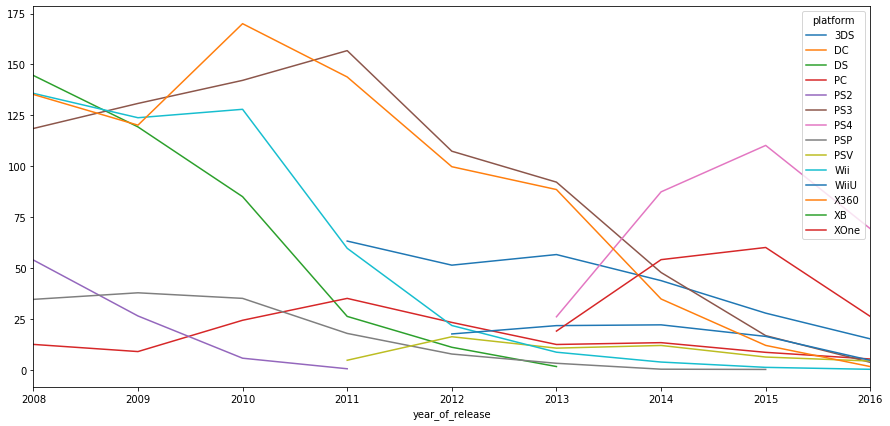

In [46]:
#further look at the correlation between years of release and a total sales.
fig,ax = plt.subplots(figsize = (15,7))
data_2007.groupby(['year_of_release','platform']).sum()['total_sales'].unstack().plot(ax = ax)

In [47]:
#detrming 5 leading platforms in sales for the period in question
sales_grouped = games_data.groupby(['platform'])['total_sales'].sum().reset_index()
sales_grouped.sort_values('total_sales',ascending=False)


,platform,total_sales
16,PS2,1255.77
28,X360,971.20
17,PS3,918.37
15,PS,730.86
4,DS,705.50
26,Wii,654.52
6,GBA,317.85
19,PSP,294.05
18,PS4,292.82
2,3DS,259.00


<BarContainer object of 16674 artists>

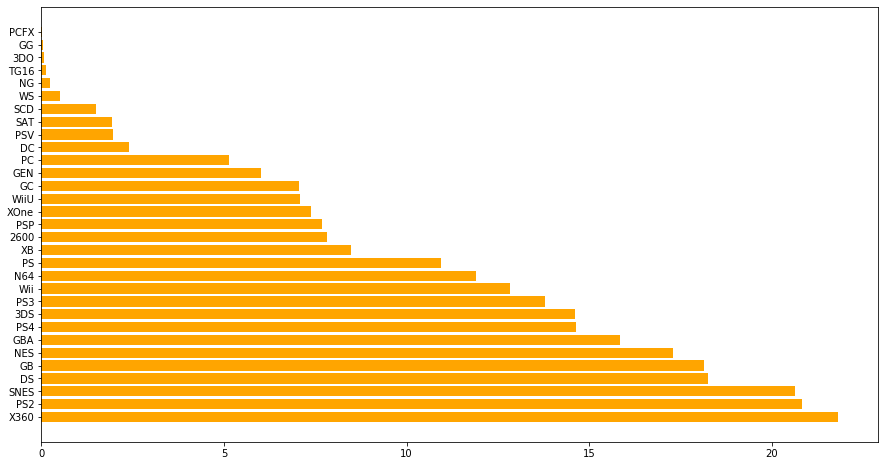

In [48]:
#breakdown of sales for each platform in visual
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(games_data['platform'], games_data['total_sales'],color='orange')

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

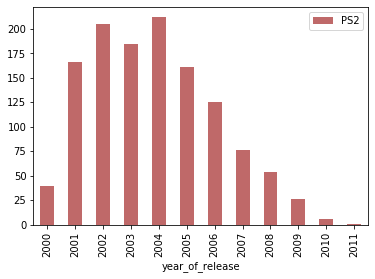

In [49]:
#analysing 5 most popular platforms and their year of release
platform_data = (games_data.query('platform in ("PS2","X360","PS3","Wii","DS")')
                 .pivot_table(index=['platform','year_of_release'],values='total_sales', aggfunc='sum'))

platform_data.reset_index(level='year_of_release', inplace=True)

data_filtered_PS2 = platform_data.query('platform in "PS2"')
data_filtered_PS2_sales = data_filtered_PS2.groupby('year_of_release').total_sales.sum()
data_filtered_PS2_sales.plot(kind = 'bar',x='year_of_release', y='total_sales',alpha=0.7,color='brown', label='PS2', legend = True)



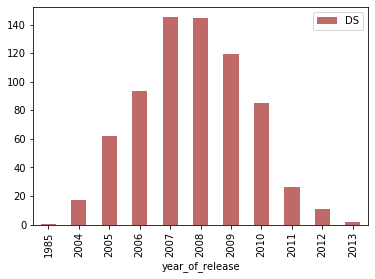

In [50]:
data_filtered_DS = platform_data.query('platform in "DS"')
data_filtered_DS_sales = data_filtered_DS.groupby('year_of_release').total_sales.sum()
data_filtered_DS_sales.plot(kind = 'bar',x='year_of_release', y='total_sales',alpha=0.7,color='brown', label='DS', legend = True)
plt.show()

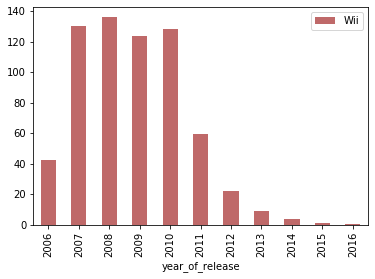

In [51]:
data_filtered_Wii = platform_data.query('platform in "Wii"')
data_filtered_Wii_sales = data_filtered_Wii.groupby('year_of_release').total_sales.sum()
data_filtered_Wii_sales.plot(kind = 'bar',x='year_of_release', y='total_sales',alpha=0.7,color='brown', label='Wii', legend = True)
plt.show()

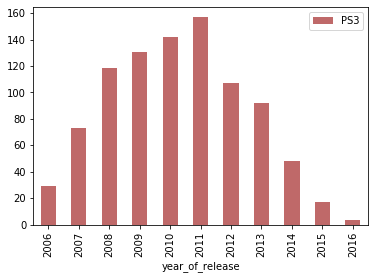

In [52]:
data_filtered_PS3 = platform_data.query('platform in "PS3"')
data_filtered_PS3_sales = data_filtered_PS3.groupby('year_of_release').total_sales.sum()
data_filtered_PS3_sales.plot(kind = 'bar',x='year_of_release', y='total_sales',alpha=0.7, color='brown',label='PS3', legend = True)
plt.show()

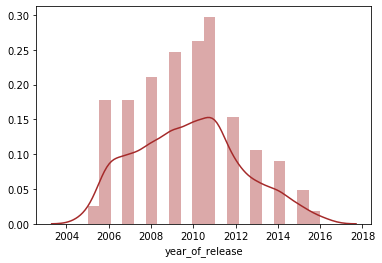

In [53]:
X360_sales = games_data.query('platform == "X360"')
sns.distplot(X360_sales['year_of_release'],color='brown')

So it looks like the average lifespan for the most popular platforms is 6 years. After that they become irrelevant. The first reason is probably connected to the advancement of technology and lack of financial feasebility for upgrades.The second reason is the lack of quality games and feature support. Altough both of these things would require more information such as system requirements for each platform and the initial investment. 

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [54]:
platforms_change = data_2007.pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc=sum, fill_value=0)
platforms_change.head()


platform,3DS,DC,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,
2008,0.00,0.04,144.59,12.42,53.90,118.52,0.0,34.55,0.00,135.80,0.00,135.26,0.18,0.0
2009,0.00,0.00,119.30,8.90,26.40,130.83,0.0,37.78,0.00,123.81,0.00,120.16,0.00,0.0
2010,0.00,0.00,85.02,24.28,5.64,142.17,0.0,35.04,0.00,127.95,0.00,170.03,0.00,0.0
2011,63.20,0.00,26.18,35.03,0.45,156.78,0.0,17.82,4.63,59.65,0.00,143.84,0.00,0.0
2012,51.36,0.00,11.01,23.22,0.00,107.36,0.0,7.69,16.19,21.71,17.56,99.74,0.00,0.0


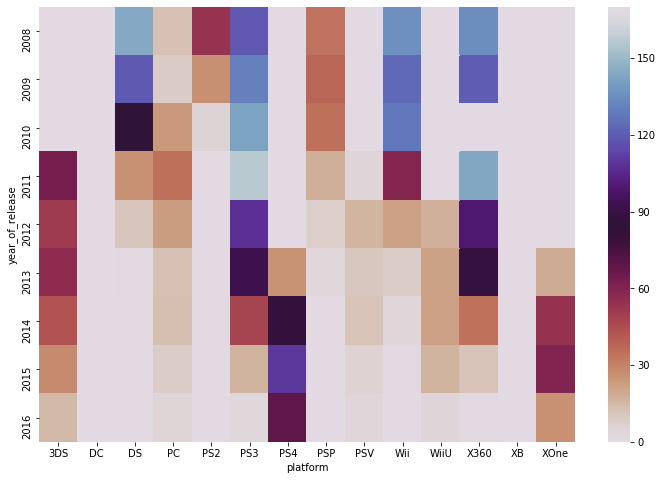

In [55]:
#collective picture
plt.figure(figsize=(12,8))
sns.heatmap(platforms_change, cmap='twilight_r')

In [56]:
#calculating the shift in sales over the span of multiple years
platforms_shift = (platforms_change - platforms_change.shift(+1)).transpose()
platforms_shift.head()                   

year_of_release,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,
3DS,NaN,0.00,0.00,63.20,-11.84,5.21,-12.81,-15.98,-12.64
DC,NaN,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,-25.29,-34.28,-58.84,-15.17,-9.47,-1.54,0.00,0.00
PC,NaN,-3.52,15.38,10.75,-11.81,-10.84,0.90,-4.76,-3.27
PS2,NaN,-27.50,-20.76,-5.19,-0.45,0.00,0.00,0.00,0.00


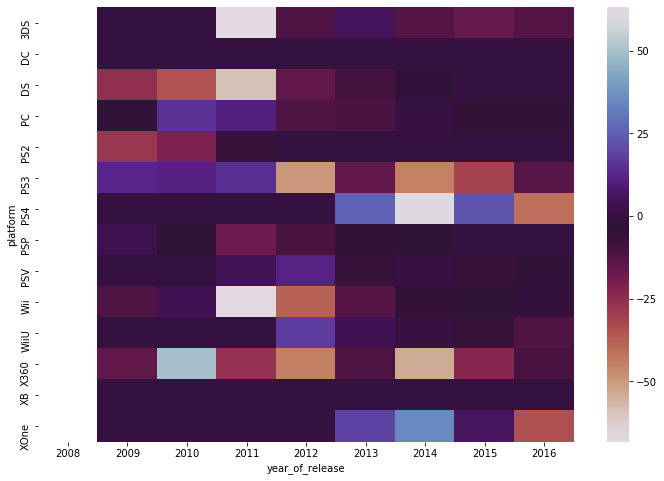

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(platforms_shift, cmap='twilight_r')

This matrics proves my point. Most of the games run through their course within roughly 4 years. There may be a potential re-release, but as is, within 4 years the platform dies out if it is not the most popular one and within 6 years if it is a popular one.

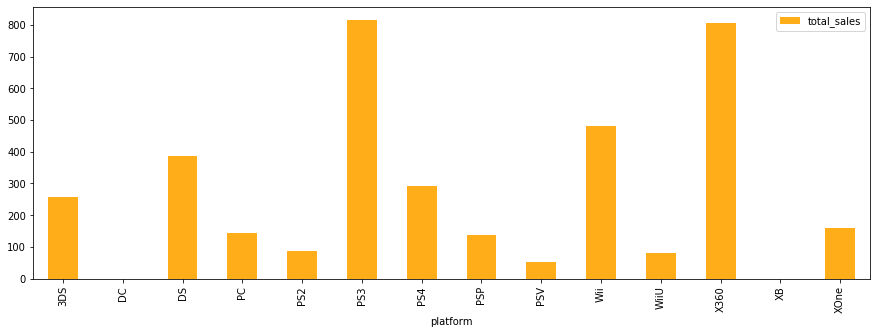

In [58]:
#cumulative of total sales within the period in question
total_sales_2007 = data_2007.groupby('platform')['total_sales'].agg('sum')
total_sales_2007.plot(kind = 'bar', x='platform',y='total_sales',alpha=0.9,color='orange', legend = True, figsize=(15,5))

So X360 and PS3 are the leaders in total sales and there is a significant gap between other platforms.In this graph we are talking about cumulative total and not per year, so the time period during which the platform has been around may be an important factor. The question to explore further would be whether or not it is for all genres or there is a particular genre that brings the most revenue.

#### What about average sales on various platforms? Describe your findings.

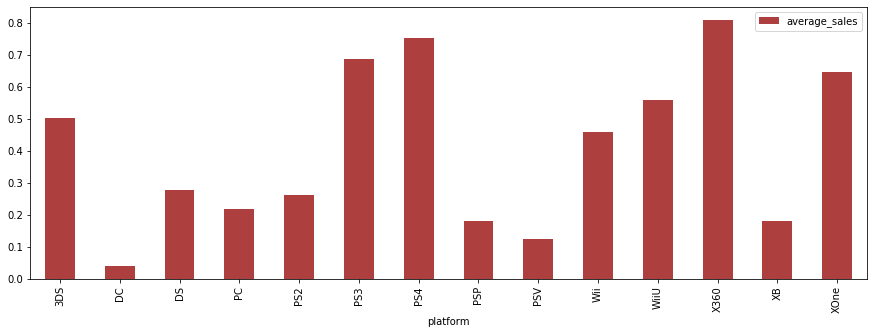

In [59]:
#average sales
avg_data_2007 = data_2007.pivot_table(index='platform', values='total_sales', aggfunc='mean')
avg_data_2007.columns = ['average_sales']

avg_data_2007.plot(kind='bar',y='average_sales',alpha=0.9,color='brown', legend=True, figsize=(15,5))

The average sales shows that X360 is still the leader and PS3 and PS4 are after it. X360 also showed the longest lifespan.

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [60]:
#analysing the most popular platform
PS2_sales = games_data.query('platform == "PS2"')

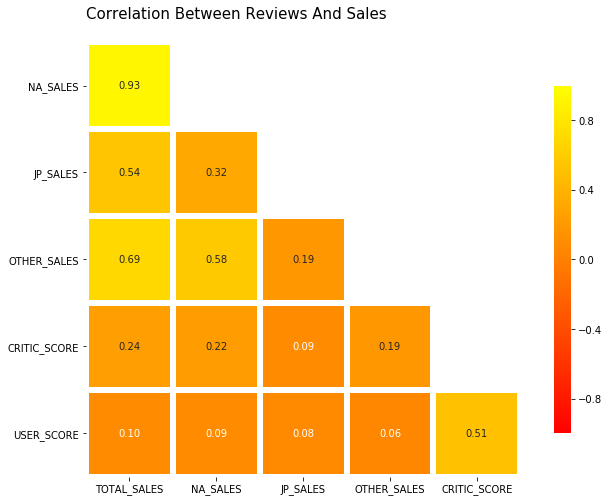

In [61]:
game_sales_plot = {'A': PS2_sales['platform'], 'B': PS2_sales['total_sales'], 'C': PS2_sales['na_sales'], 'D': PS2_sales['eu_sales'], 'E': PS2_sales['jp_sales'], 'F': PS2_sales['other_sales'], 'J': PS2_sales['critic_score'], 'H': PS2_sales['user_score']}
data_plot = pd.DataFrame(game_sales_plot, columns = ['A','B','C','D'])

corr = games_data[['platform','total_sales','na_sales','jp_sales','other_sales','critic_score','user_score']].corr()

fig, ax = plt.subplots(figsize=(12, 8))
# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr1 = corr.iloc[1:,:-1].copy()

# plot heatmap

sb.heatmap(corr1, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8},cmap='autumn', square=True)
# ticks
yticks = [i.upper() for i in corr1.index]
xticks = [i.upper() for i in corr1.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Correlation Between Reviews And Sales\n'
plt.title(title, loc='left', fontsize=15)
plt.show()



Ultimately, the critic score has more imfluence than the user score. For some categories such as other sales, the number is pretty significant.

In [62]:
PS2_sales.groupby('platform')[['critic_score','user_score','total_sales']].corr()

critic_score  user_score  total_sales
platform                                                    
PS2      critic_score      1.000000    0.495002     0.344271
         user_score        0.495002    1.000000     0.210817
         total_sales       0.344271    0.210817     1.000000

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

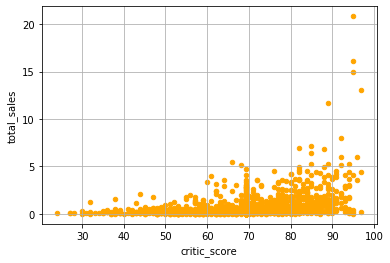

In [63]:
PS2_sales.plot(x='critic_score', y='total_sales',kind='scatter',color='orange',grid=True)

What is interesting about this graph is that it demonstrate that the significance level for the critic score basically starts from approximately 65.

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant?

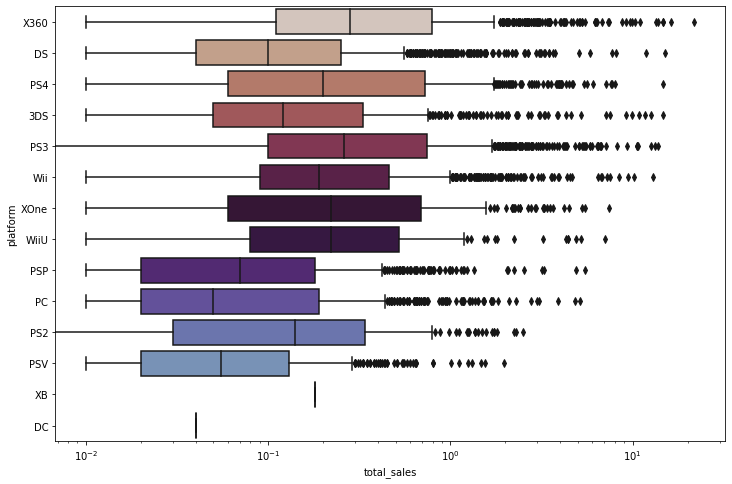

In [64]:

plt.figure(figsize=(12,8))
sns.boxplot(x="total_sales", y="platform",palette="twilight_r", data=data_2007)

plt.xscale('log')
#plt.yscale('log')
plt.show()

There is definitely difference in sales and we can also see that for some of the platforms there is more consistency comparing to other platforms.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [65]:
genres_grouped = data_2007.groupby(['genre','platform'])['total_sales'].sum().reset_index()
genres_grouped.sort_values('total_sales',ascending=False).head(15)


,genre,platform,total_sales
4,Action,PS3,258.99
106,Shooter,X360,222.68
10,Action,X360,215.82
100,Shooter,PS3,170.86
45,Misc,Wii,148.29
124,Sports,PS3,119.17
130,Sports,X360,114.72
128,Sports,Wii,102.84
101,Shooter,PS4,88.56
84,Role-Playing,3DS,84.20


The most profitable genres are Action, Shooter, Misc, Sports and Role_Playing. My theory is that it is possible that the same genre may be doing differntly depending on which platform the game of such genre is performing. The anylisis below will provide some insights.

In [66]:
action_data = genres_grouped.query('genre =="Action"')
action_data.sort_values('total_sales',ascending=False)

,genre,platform,total_sales
4,Action,PS3,258.99
10,Action,X360,215.82
5,Action,PS4,83.48
8,Action,Wii,76.83
1,Action,DS,71.77
0,Action,3DS,57.84
11,Action,XOne,37.31
6,Action,PSP,31.56
2,Action,PC,24.80
9,Action,WiiU,19.07


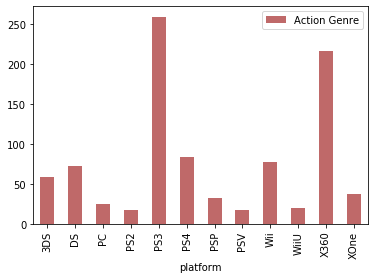

In [67]:
action_data.plot(kind = 'bar',x='platform', y='total_sales',alpha=0.7,color='brown', label='Action Genre', legend = True)
plt.show()

In [68]:
sport_data = genres_grouped.query('genre =="Sports"')
sport_data.sort_values('total_sales',ascending=False)

,genre,platform,total_sales
124,Sports,PS3,119.17
130,Sports,X360,114.72
128,Sports,Wii,102.84
125,Sports,PS4,46.91
132,Sports,XOne,26.65
123,Sports,PS2,23.26
121,Sports,DS,22.83
126,Sports,PSP,19.40
122,Sports,PC,7.40
120,Sports,3DS,6.15


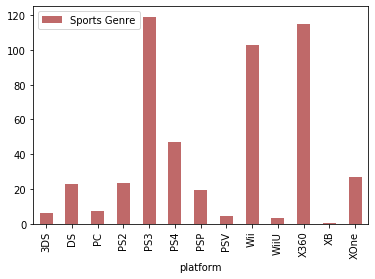

In [69]:
sport_data.plot(kind = 'bar',x='platform', y='total_sales',alpha=0.7,color='brown', label='Sports Genre', legend = True)
plt.show()

In [70]:
misc_data = genres_grouped.query('genre =="Misc"')
misc_data.sort_values('total_sales',ascending=False)

,genre,platform,total_sales
45,Misc,Wii,148.29
47,Misc,X360,80.79
38,Misc,DS,58.99
41,Misc,PS3,41.00
40,Misc,PS2,15.73
46,Misc,WiiU,12.46
37,Misc,3DS,10.99
42,Misc,PS4,8.19
48,Misc,XOne,7.43
43,Misc,PSP,7.11


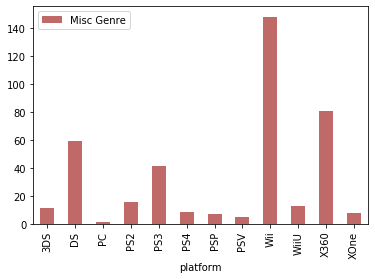

In [71]:
misc_data.plot(kind = 'bar',x='platform', y='total_sales',alpha=0.7,color='brown', label='Misc Genre', legend = True)
plt.show()

In [72]:
shooter_data = genres_grouped.query('genre =="Shooter"')
misc_data.sort_values('total_sales',ascending=False)

,genre,platform,total_sales
45,Misc,Wii,148.29
47,Misc,X360,80.79
38,Misc,DS,58.99
41,Misc,PS3,41.00
40,Misc,PS2,15.73
46,Misc,WiiU,12.46
37,Misc,3DS,10.99
42,Misc,PS4,8.19
48,Misc,XOne,7.43
43,Misc,PSP,7.11


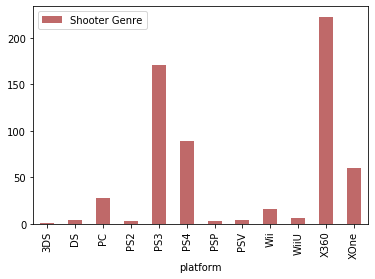

In [73]:
shooter_data.plot(kind = 'bar',x='platform', y='total_sales',alpha=0.7,color='brown', label='Shooter Genre', legend = True)
plt.show()

In [74]:
adventure_data = genres_grouped.query('genre =="Adventure"')
adventure_data.sort_values('total_sales',ascending=False)

,genre,platform,total_sales
14,Adventure,DS,32.95
17,Adventure,PS3,17.24
21,Adventure,Wii,13.31
23,Adventure,X360,9.24
19,Adventure,PSP,7.62
18,Adventure,PS4,6.34
12,Adventure,3DS,4.83
15,Adventure,PC,3.87
20,Adventure,PSV,3.84
16,Adventure,PS2,2.91


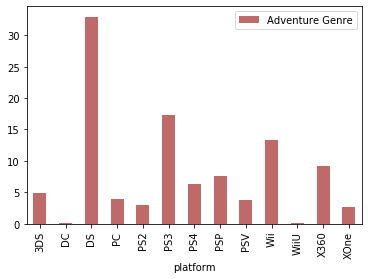

In [75]:
adventure_data.plot(kind = 'bar',x='platform', y='total_sales',alpha=0.7,color='brown', label='Adventure Genre', legend = True)
plt.show()

Alright, so the difference is stagerring. Based on the dataset, we can assume that it is not only that the same genre is performing differently depending on the platform, but also, perhaps the same games. While X360 is the leader in most cases, it is not the best host for the Adventure genre showcasing average results for this category. It also appears that Shooter genre is the most profitable for this platform. Other platforms also see differnce depending on various genres and it looks like each one of them is more caracterised by one of two genre rather than all of them.

## Step 3.Conclusion

So the relevant data starts, on my opinion from 2007. The lifespan of the most popular games is roughly 6 years for the rest it is three to four. The most popular platforms are: PS2, X360,PS3,Wii and DS.

Based on the graphs, it appears that all of the platforms have seen a decline, so we can assume that 2017 would not be the leader of sales in the game industry.The sales are effected by critics'and users' reviews and the threshold of relevancy of the scores is roughly 65. The same genre performs differently depends on the platform. 

## Step 4. Create a user profile for each region

#### For each region (NA, EU, JP), determine:

#### The top five platforms. Describe variations in their market shares from region to region.

In [76]:
region_platforms = data_2007[['platform','na_sales','eu_sales','jp_sales']]
region_platforms = region_platforms.groupby(by=['platform']).sum().reset_index()
#region_platforms.head()


In [77]:
na_platform = region_platforms[['na_sales','platform']].sort_values('na_sales', ascending = False)
na_platform.head()

,na_sales,platform
11,490.53,X360
5,342.00,PS3
9,277.88,Wii
2,197.85,DS
6,103.62,PS4


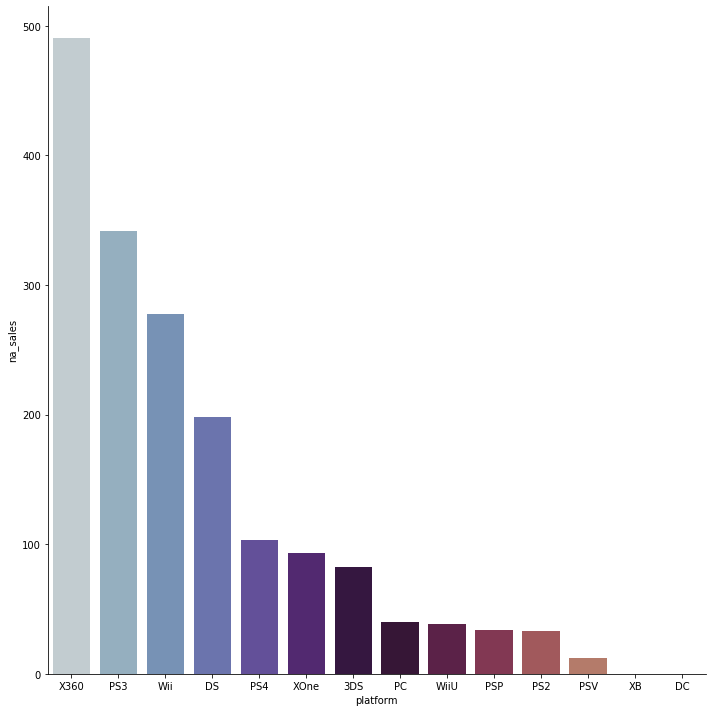

In [78]:
sns.catplot(x="platform", y="na_sales",kind="bar",data=na_platform,height=10,palette="twilight" )

In [79]:
eu_platform = region_platforms[['eu_sales','platform']].sort_values('eu_sales', ascending = False)
eu_platform.head()

,eu_sales,platform
5,284.55,PS3
11,234.84,X360
9,131.62,Wii
6,128.60,PS4
2,86.13,DS


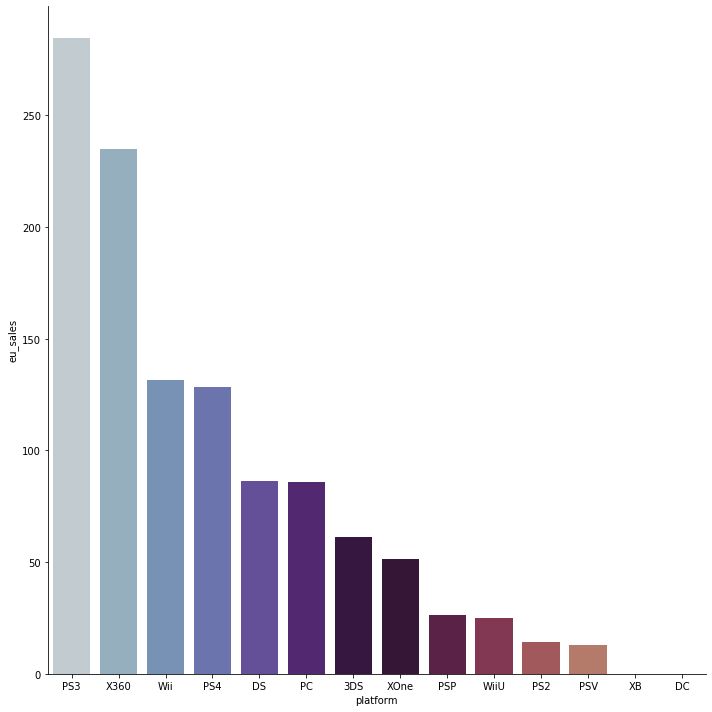

In [80]:
sns.catplot(x="platform", y="eu_sales",kind="bar",data=eu_platform,height=10,palette="twilight" )

In [81]:
jp_platform = region_platforms[['jp_sales','platform']].sort_values('jp_sales', ascending = False)
jp_platform.head()

,jp_sales,platform
0,100.62,3DS
2,76.12,DS
5,73.13,PS3
7,60.46,PSP
9,32.71,Wii


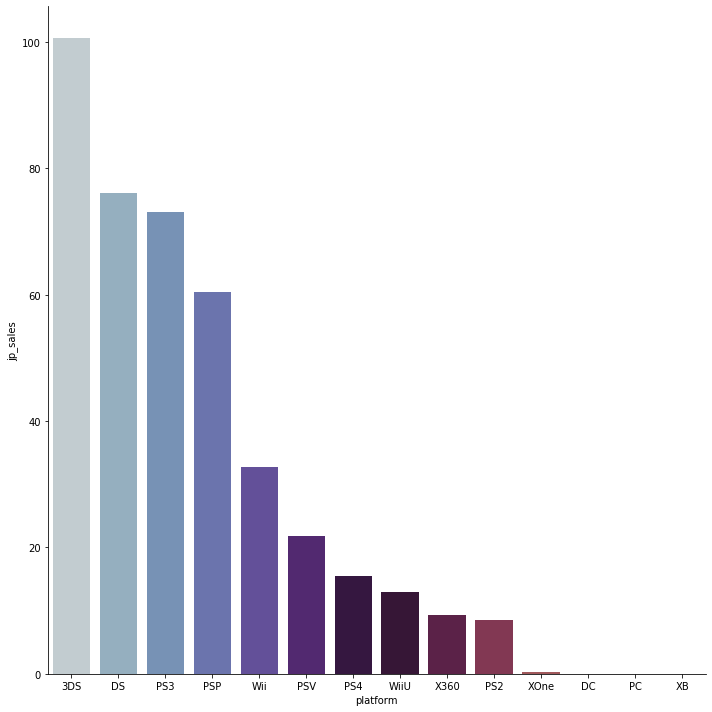

In [82]:
sns.catplot(x="platform", y="jp_sales",kind="bar",data=jp_platform,height=10,palette="twilight" )

Yes, there is a significant difference in popularity of platforms based on the region.

#### The top five genres. Explain the difference.
#### Do ESRB ratings affect sales in individual regions?

In [83]:
region_genre = data_2007[['genre','na_sales','eu_sales','jp_sales']]
region_genre = region_genre.groupby(by=['genre']).sum().reset_index()
#region_platforms.head()


In [84]:
na_genre = region_genre[['na_sales','genre']].sort_values('na_sales', ascending = False)
na_genre.head()

,na_sales,genre
0,422.76,Action
8,311.26,Shooter
10,250.43,Sports
3,211.61,Misc
7,155.81,Role-Playing


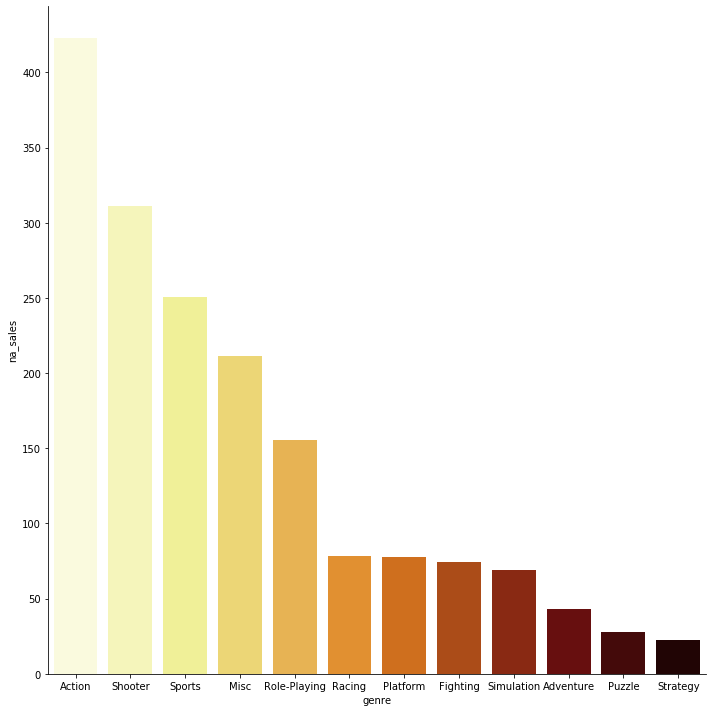

In [85]:
sns.catplot(x="genre", y="na_sales",kind="bar",data=na_genre,height=10,palette="afmhot_r" )

In [86]:
eu_genre = region_genre[['eu_sales','genre']].sort_values('eu_sales', ascending = False)
eu_genre.head()

,eu_sales,genre
0,295.19,Action
8,208.35,Shooter
10,159.43,Sports
3,107.00,Misc
7,94.46,Role-Playing


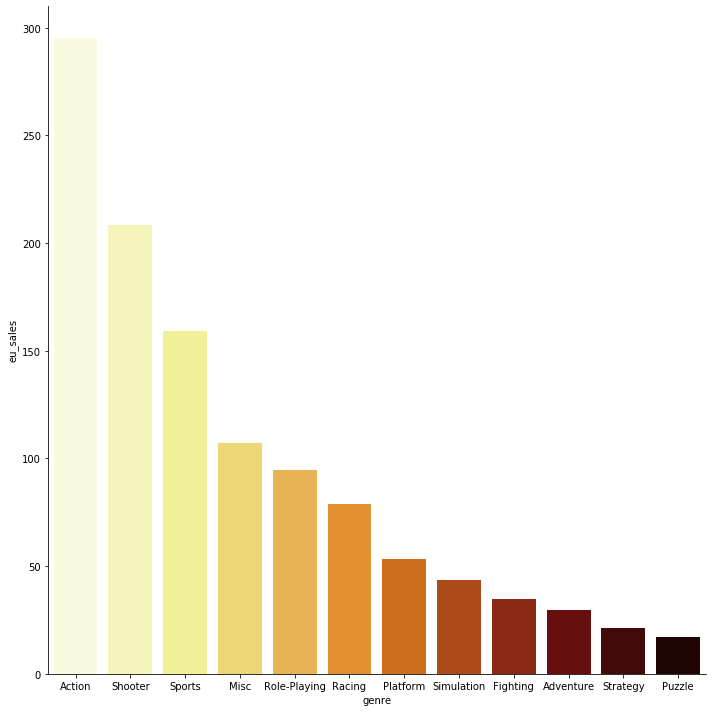

In [87]:
sns.catplot(x="genre", y="eu_sales",kind="bar",data=eu_genre,height=10,palette="afmhot_r" )

In [88]:
jp_genre = region_genre[['jp_sales','genre']].sort_values('jp_sales', ascending = False)
jp_genre.head()

,jp_sales,genre
7,138.12,Role-Playing
0,88.80,Action
3,37.33,Misc
10,24.82,Sports
1,23.36,Adventure


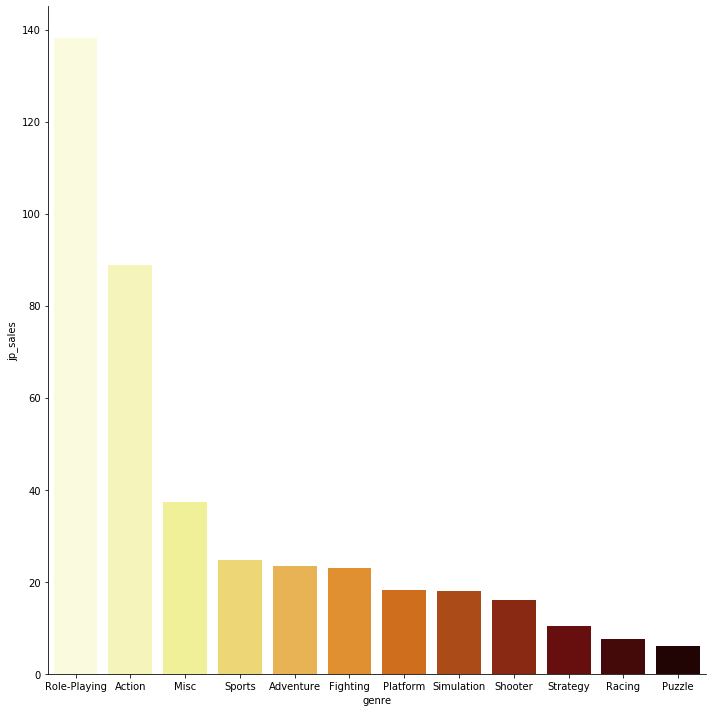

In [89]:
sns.catplot(x="genre", y="jp_sales",kind="bar",data=jp_genre,height=10,palette="afmhot_r" )

When it comes to genres, they perform differently as well.

## Step 4. Conclusion

Both genre and platforms vary in their popularity based on the region. There are several possible reasons. First, some platforms may have more successful afvertising campaigns in some areas, thus, better reach. Second, cultural differences. Some genres may be more popular than others because games are often connected to movies, magazines etc., so whatever is popular in a particular country, including what is popular relative to a particular age would be reflected in gaming as well.

In regards to assesing the ESRB rating, I think it is important to keep in mind that different cultures treat those ratings in a different way. For example, content that has more violence is more acceptable in the US than in Russia while nudity requires sensoring. At the same time, in some european countries, it is not culturally acceptable for young kids to be exposed to violence. So, while on the surface, the correlation may show us that ratings affect sales, this correlation would be a perpetual "chicken and egg" problem unless we understand in what way the may affect the sales and why.

## Step 5. Test the following hypotheses:

#### Average user ratings of the Xbox One and PC platforms are the same.

I do not believe that the suggested hypothesis is true given the disparity in the overall performance of the platforms. We can see it on the graphs in Step 4. and on the boxplot in Step 3, so with the analysis below, I will test if it is true or not. 

It is possible that the difference in perfornce is the matter of popularity and not disparity in ratings.Meaning they can be both bad or both good. There is also a question of which reviewing platforms were used, how credible and popular are they? In the dataset, we do not have the information regarding the level of outreach of the revewing platforms.

The relatively small alpha value comes from the fact that is just a small possibility of the platforms being the same. However, again, there is still a chance that there is more goes to it than the outline of sales from previous tasks, so I am still leaving some room for my doubt in this regard. 

In [90]:
XOne_rating = data_2007.query('platform == "XOne" and user_score.isnull() == False')
XOne_rating = XOne_rating['user_score']
XOne_rating

PC_rating = data_2007.query('platform == "PC" and user_score.isnull() == False')
PC_rating = PC_rating['user_score']
PC_rating

alpha = 0.05

results = st.ttest_ind(XOne_rating,PC_rating)
print('p-value:',results.pvalue)


if(results.pvalue < alpha):
    print('Reject the Null Hypothesis')
else:
    print('Cannot reject the Null Hypothesis')

p-value: 0.3975991893493881
Cannot reject the Null Hypothesis


#### Average user ratings for the Action and Sports genres are different. Set the alpha threshold value yourself.

So here, I am not sure, hence the alpha value.The first issue is that they are two different genres that perform differently across different platforms. We are already talking about multiple variable that would need to be taken into account. 

Another issue is that even if they are the same, it would not necessarity translate into better or worse performance worlwide due to cultural differences and preferences as shown in step 4. Which means that the same rating may indicate the quality of the platform but not necessarily its popularity. 

In [91]:
actions_rating = data_2007.query('genre =="Action" and user_score.isnull() == False')
actions_rating = actions_rating['user_score']
actions_rating

sports_rating = data_2007.query('genre == "Sports" and user_score.isnull() == False')
sports_rating = sports_rating['user_score']
sports_rating 

alpha = 0.5

results = st.ttest_ind(actions_rating,sports_rating)
print('p-value:',results.pvalue)

if(results.pvalue < alpha):
    print('Reject the Null Hypothesis')
else:
    print('Cannot reject the Null Hypothesis')

p-value: 3.28833387712294e-13
Reject the Null Hypothesis


## Step 5. Conclusion

There is high possibility that the ratings for XOne and PC are in fact the same. And the ratings for Sports and Action are possibly not the same. 

## Step 6. Write a general conclusion

Based on the data analysed in this project, we predict that 2017 would not be a very sucessful year for gaming platforms. It is shown based on the overall trends and considering the year, it is reasonable to assume that the decline was connected to the apperance of high quality first person shooter multiplayer games like Fortnite.It is connected to the advancement in technology and trends. 

The hypothesis would require further research that can be based on the existing analysis.Various platforms perform differntly in different markets. It is connected to user preferences and cultural differences where some markets prefer one genre over another. The longest the platform can be popular is roughly six years, perhaps a bit more. 

Some genres define certain platforms' success.It is possible that the popularity of a particular platform is connected to its price and affordability given that the ratings might be the same but the outcome differt and vice versa based on what we've seen in step 5. 